In [2]:
import pandas as pd
import pickle
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)
import os
import statistics
import pymatgen as pmg
from pymatgen.analysis.graphs import StructureGraph
from pymatgen.analysis.local_env import CutOffDictNN
from pymatgen.core import Structure

import logging, sys
logging.disable(sys.maxsize)
import statistics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_pickle('pickles/df_for_kevin.pkl')
df.head()

,normalization_factors,vbm,cbm,homo_adj,lumo_adj,homo_above_vacuum,lumo_above_vacuum,vacuum_potential,band_gap_energy,band_gap_transition,bandgap,bandgap_adj,direct_band_gap_energy,effective_mass_hole,effective_mass_electron,effective_mass_hole_np,effective_mass_electron_np,cube_products
label,,,,,,,,,,,,,,,,,,
xopkuj,0.487495,0.199497,3.683041,-0.500503,4.583041,-5.398656,-0.315112,4.898153,3.483544,\Gamma-\Gamma,3.497678,4.347678,3.483544,14.876244,6.315620,14.892200,6.281887,0.487495
yudkir,0.483830,NaN,NaN,NaN,NaN,NaN,NaN,3.513211,NaN,NaN,2.676230,3.526230,NaN,NaN,NaN,NaN,NaN,0.483830
zejyev,0.294397,0.634390,3.386016,-0.065610,4.286016,-4.264834,0.086792,4.199224,2.751626,"Z-(0.000,0.350,0.000)",2.601646,3.451646,2.760591,11.117865,5.605309,10.752650,5.890437,0.294397
xefbal,0.296614,1.128213,3.511875,0.428213,4.411875,-4.066935,-0.083274,4.495149,2.383662,X-Z,2.496763,3.346763,2.393833,246.573851,1.116834,240.234003,1.062895,0.296614
witqib,0.514832,0.799362,3.159399,0.099362,4.059399,-5.927756,-1.967719,6.027118,2.360037,U_2-\Gamma,2.314716,3.164716,2.361694,174.451361,1.866102,168.926755,1.797661,0.514832


In [18]:
## parameters for plotting
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

fig_sizes = set_size(345)
plt.rcParams['lines.markersize'] = 2.5
plt.rcParams['axes.labelsize'] = 12


In [4]:
HER = -4.4
OER = -5.629
VIS_E = 3.2

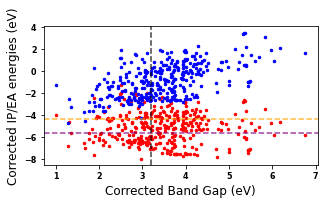

In [6]:
plt.figure(figsize=fig_sizes)

plt.scatter(df['bandgap_adj'], df['homo_above_vacuum'],color='red')
plt.scatter(df['bandgap_adj'], df['lumo_above_vacuum'],color='blue')
plt.axhline(y=HER, color='orange', linestyle='--', alpha=0.75, label='hi') ## h2/h+
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2
plt.axvline(x=VIS_E, color='black', linestyle='--',alpha=0.75) ## upper limit of visible light
#plt.title('')
plt.xlabel('Corrected Band Gap (eV)')
plt.ylabel('Corrected IP/EA energies (eV)')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.legend([r"$H^{+}/H_{2}$", r"$H_2O/O_2$"])
#plt.savefig("plots/IPEA")
plt.show()

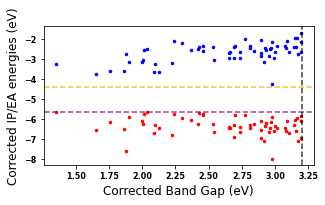

In [7]:
### same plot as above but filtered
df_filtered_basic = df[(df['bandgap_adj']<VIS_E)&(df['homo_above_vacuum']<OER)\
                         &(df['lumo_above_vacuum']>HER)]
plt.figure(figsize=fig_sizes)
plt.scatter(df_filtered_basic['bandgap_adj'], df_filtered_basic['homo_above_vacuum'],color='red')
plt.scatter(df_filtered_basic['bandgap_adj'], df_filtered_basic['lumo_above_vacuum'],color='blue')
plt.axhline(y=HER, color='orange', linestyle='--', alpha=0.75, label='hi') ## h2/h+
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2
plt.axvline(x=VIS_E, color='black', linestyle='--',alpha=0.75) ## upper limit of visible light
plt.title('')
plt.xlabel('Corrected Band Gap (eV)')
plt.ylabel('Corrected IP/EA energies (eV)')
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.legend([r"$H^{+}/H_{2}$", r"$H_2O/O_2$"])
# plt.savefig("plots/IPEA_filter")
plt.show()

66


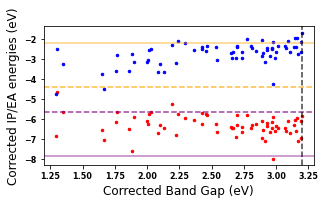

In [8]:
### same plot as above but filtered s.t. homo is less than 2.2 eV below OER & lumo is less than 2.2 eV above HER
#df_filtered_gap_2ev = df_filtered_gap[((df_filtered_gap['lumo_above_vacuum'])<(HER+2.2))]#\
                         #&((df_filtered_gap['lumo_above_vacuum'])<(HER+2.2))]
df_filtered_bg = df[df['bandgap_adj']<3.2]
df_filtered_gap_2ev = df_filtered_bg[(((df_filtered_bg['homo_above_vacuum'])>(OER-2.2))\
                                     &((df_filtered_bg['homo_above_vacuum'])<(OER)))\
                                     |(((df_filtered_bg['lumo_above_vacuum'])<(HER+2.2))\
                                     &((df_filtered_bg['lumo_above_vacuum'])>(HER)))]
print(len(df_filtered_gap_2ev))
plt.figure(figsize=fig_sizes)
plt.scatter(df_filtered_gap_2ev['bandgap_adj'], df_filtered_gap_2ev['homo_above_vacuum'],color='red')
plt.scatter(df_filtered_gap_2ev['bandgap_adj'], df_filtered_gap_2ev['lumo_above_vacuum'],color='blue')
plt.axhline(y=HER, color='orange', linestyle='--', alpha=0.75, label='hi') ## h2/h+
plt.axhline(y=HER+2.2, color='orange', linestyle='-', alpha=0.5) ## h2/h+
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2
plt.axhline(y=OER-2.2, color='purple', linestyle='-',alpha=0.5)
plt.axvline(x=VIS_E, color='black', linestyle='--',alpha=0.75) ## upper limit of visible light
# plt.title('PBE-corrected Ionization Potential and Elecetron Affinity energies for 149 MOFs')
plt.xlabel('Corrected Band Gap (eV)')
plt.ylabel('Corrected IP/EA energies (eV)')
#plt.legend([r"$H^{+}/H_{2}$", r"$H_2O/O_2$"])
plt.tick_params(labelsize=8)
plt.tight_layout()
#plt.savefig("plots/HER_or_OER_filter")
plt.show()

In [9]:
df[df['bandgap'] < 1][['bandgap']] ## get mofs with less than 1 eV bandgap

,bandgap
label,
yosloh,0.155956
L35_N7,0.443050
L37_N7,0.819753
L9_N7,0.500847
BETHEP_clean,0.452963
L8_N7,0.911588
JITPOS_SL,0.994088
SIBMIB_clean,0.914917
MOSGIM_clean,0.803975


### graphs to make
- bandgap vs transition metal
- bandgaps vs effective mass
- homo,lumo overlap vs metal

In [16]:
def get_relaxed_filename(row):
    
    return "../cifs/relaxed_structures/"+row['label']+".cif"

def has_transition_metal(row):   
    s = pmg.Structure.from_file(row['relaxed_file'])
    for z in s.symbol_set:
        if pmg.Element(z).is_transition_metal:
            return True
        
    return False

def get_metals(row):  
    metals = []
    s = pmg.Structure.from_file(row['relaxed_file'])
    for z in s.symbol_set:
        if pmg.Element(z).is_metal:
            metals.append(z)
            
    return metals

def metal_string(metals):
    if len(metals) == 1:
        return metals[0]
    else:
        str_metal = ""
        for metal in metals:
            str_metal += metal + "/"
        return str_metal[:-1]
    

In [11]:
str_ = "hi/by/"
str_[:-1]

'hi/by'

In [17]:
df = df.reset_index()
df['relaxed_file'] = df.apply(lambda row: get_relaxed_filename(row), axis=1)
df.set_index('label')
df.head()

,label,normalization_factors,vbm,cbm,homo_adj,lumo_adj,homo_above_vacuum,lumo_above_vacuum,vacuum_potential,band_gap_energy,bandgap_adj,band_gap_transition,bandgap,direct_band_gap_energy,effective_mass_hole,effective_mass_electron,effective_mass_hole_np,effective_mass_electron_np,cube_products,relaxed_file
0,xopkuj,0.487495,0.199497,3.683041,-0.500503,4.583041,-5.398656,-0.315112,4.898153,3.483544,4.347678,\Gamma-\Gamma,3.497678,3.483544,14.876244,6.315620,14.892200,6.281887,0.487495,../cifs/relaxed_structures/xopkuj.cif
1,yudkir,0.483830,NaN,NaN,NaN,NaN,NaN,NaN,3.513211,NaN,3.526230,NaN,2.676230,NaN,NaN,NaN,NaN,NaN,0.483830,../cifs/relaxed_structures/yudkir.cif
2,zejyev,0.294397,0.634390,3.386016,-0.065610,4.286016,-4.264834,0.086792,4.199224,2.751626,3.451646,"Z-(0.000,0.350,0.000)",2.601646,2.760591,11.117865,5.605309,10.752650,5.890437,0.294397,../cifs/relaxed_structures/zejyev.cif
3,xefbal,0.296614,1.128213,3.511875,0.428213,4.411875,-4.066935,-0.083274,4.495149,2.383662,3.346763,X-Z,2.496763,2.393833,246.573851,1.116834,240.234003,1.062895,0.296614,../cifs/relaxed_structures/xefbal.cif
4,witqib,0.514832,0.799362,3.159399,0.099362,4.059399,-5.927756,-1.967719,6.027118,2.360037,3.164716,U_2-\Gamma,2.314716,2.361694,174.451361,1.866102,168.926755,1.797661,0.514832,../cifs/relaxed_structures/witqib.cif


In [18]:
df['transition_metal'] = df.apply(has_transition_metal, axis=1)

In [19]:
df['metals'] = df.apply(get_metals, axis=1)

In [20]:
df['metal'] = df['metals'].apply(metal_string)
df_transition = df[df['transition_metal']]
df_transition.head()
df.head()

,label,normalization_factors,vbm,cbm,homo_adj,lumo_adj,homo_above_vacuum,lumo_above_vacuum,vacuum_potential,band_gap_energy,...,direct_band_gap_energy,effective_mass_hole,effective_mass_electron,effective_mass_hole_np,effective_mass_electron_np,cube_products,relaxed_file,transition_metal,metals,metal
0,xopkuj,0.487495,0.199497,3.683041,-0.500503,4.583041,-5.398656,-0.315112,4.898153,3.483544,...,3.483544,14.876244,6.315620,14.892200,6.281887,0.487495,../cifs/relaxed_structures/xopkuj.cif,True,[Cd],Cd
1,yudkir,0.483830,NaN,NaN,NaN,NaN,NaN,NaN,3.513211,NaN,...,NaN,NaN,NaN,NaN,NaN,0.483830,../cifs/relaxed_structures/yudkir.cif,True,[Zn],Zn
2,zejyev,0.294397,0.634390,3.386016,-0.065610,4.286016,-4.264834,0.086792,4.199224,2.751626,...,2.760591,11.117865,5.605309,10.752650,5.890437,0.294397,../cifs/relaxed_structures/zejyev.cif,True,[Zn],Zn
3,xefbal,0.296614,1.128213,3.511875,0.428213,4.411875,-4.066935,-0.083274,4.495149,2.383662,...,2.393833,246.573851,1.116834,240.234003,1.062895,0.296614,../cifs/relaxed_structures/xefbal.cif,True,[Ag],Ag
4,witqib,0.514832,0.799362,3.159399,0.099362,4.059399,-5.927756,-1.967719,6.027118,2.360037,...,2.361694,174.451361,1.866102,168.926755,1.797661,0.514832,../cifs/relaxed_structures/witqib.cif,True,[Ag],Ag


In [19]:
HER = -4.4
OER = -5.629
VIS_E = 3.2

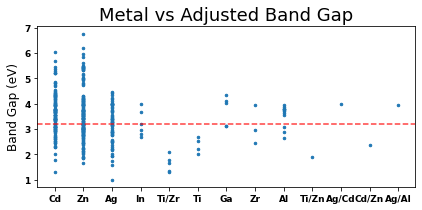

In [22]:
plt.figure(figsize=(fig_sizes[0]+2,fig_sizes[1]))
plt.tick_params(labelsize=9)
plt.scatter(df['metal'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.title("Metal vs Adjusted Band Gap")
plt.savefig("plots/metal_bandgap.png")
plt.show()

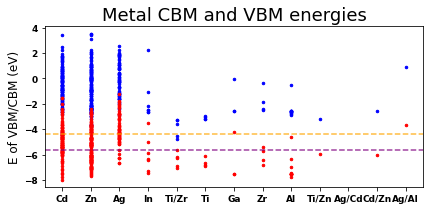

In [23]:
plt.figure(figsize=(fig_sizes[0]+2,fig_sizes[1]))
plt.tick_params(labelsize=9)

plt.scatter(df['metal'], df['lumo_above_vacuum'], color='blue')
plt.scatter(df['metal'], df['homo_above_vacuum'], color='red')

plt.axhline(y=HER, color='orange', linestyle='--', alpha=0.75, label='hi') ## h2/h+
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2
plt.ylabel("E of VBM/CBM (eV)")
plt.title("Metal CBM and VBM energies")
plt.savefig("plots/metal_cbmvbm.png")
plt.show()

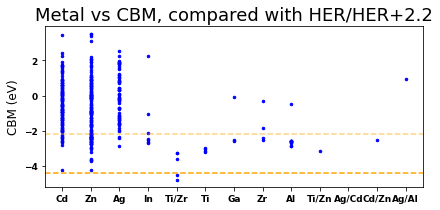

In [24]:
### CBM/HER (Lumo)
plt.figure(figsize=(fig_sizes[0]+2,fig_sizes[1]))
plt.tick_params(labelsize=9)
plt.scatter(df['metal'], df['lumo_above_vacuum'], color='blue')
plt.axhline(y=HER, color='orange', linestyle='--') ## h2/h+ HER
plt.axhline(y=HER+2.2, color='orange', linestyle='--', alpha=0.5)
plt.ylabel("CBM (eV)")
plt.title("Metal vs CBM, compared with HER/HER+2.2")
plt.savefig("plots/metal_cbm.png")
plt.show()

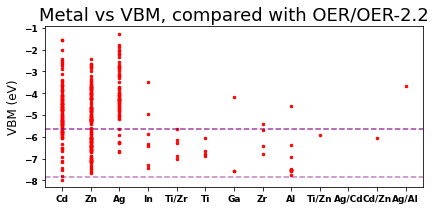

In [25]:
### VBM/OER (Homo)
plt.figure(figsize=(fig_sizes[0]+2,fig_sizes[1]))
plt.tick_params(labelsize=9)
plt.scatter(df['metal'], df['homo_above_vacuum'], color='red')
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM (eV)")
plt.title("Metal vs VBM, compared with OER/OER-2.2")
plt.savefig("plots/metal_vbm")
plt.show()

## and what was the coordination chemistry, is there any difference of havingCOO , Sulfur , imidazolate ?

In [32]:
### START WITH JUST ONE MOF, the homie yevwig
yevwig = df[df['label'].str.contains('yevwig')].iloc[0]

,label,normalization_factors,vbm,cbm,homo_adj,lumo_adj,homo_above_vacuum,lumo_above_vacuum,vacuum_potential,band_gap_energy,...,direct_band_gap_energy,effective_mass_hole,effective_mass_electron,effective_mass_hole_np,effective_mass_electron_np,cube_products,relaxed_file,transition_metal,metals,metal
0,xopkuj,0.487495,0.199497,3.683041,-0.500503,4.583041,-5.398656,-0.315112,4.898153,3.483544,...,3.483544,14.876244,6.315620,14.892200,6.281887,0.487495,../cifs/relaxed_structures/xopkuj.cif,True,[Cd],Cd
1,yudkir,0.483830,NaN,NaN,NaN,NaN,NaN,NaN,3.513211,NaN,...,NaN,NaN,NaN,NaN,NaN,0.483830,../cifs/relaxed_structures/yudkir.cif,True,[Zn],Zn
2,zejyev,0.294397,0.634390,3.386016,-0.065610,4.286016,-4.264834,0.086792,4.199224,2.751626,...,2.760591,11.117865,5.605309,10.752650,5.890437,0.294397,../cifs/relaxed_structures/zejyev.cif,True,[Zn],Zn
3,xefbal,0.296614,1.128213,3.511875,0.428213,4.411875,-4.066935,-0.083274,4.495149,2.383662,...,2.393833,246.573851,1.116834,240.234003,1.062895,0.296614,../cifs/relaxed_structures/xefbal.cif,True,[Ag],Ag
4,witqib,0.514832,0.799362,3.159399,0.099362,4.059399,-5.927756,-1.967719,6.027118,2.360037,...,2.361694,174.451361,1.866102,168.926755,1.797661,0.514832,../cifs/relaxed_structures/witqib.cif,True,[Ag],Ag
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,zejnej,0.251966,1.331000,4.638124,0.631000,5.538124,-3.134480,1.772643,3.765481,3.307123,...,3.307124,40.803234,69111.684291,41.294250,33154.044147,0.251966,../cifs/relaxed_structures/zejnej.cif,True,[Ag],Ag
471,xircil,0.616781,0.986260,3.954977,0.286260,4.854977,-4.678559,-0.109842,4.964819,2.968717,...,2.980281,19.928611,1.647207,20.505176,1.584690,0.616781,../cifs/relaxed_structures/xircil.cif,True,[Ag],Ag
472,zeknel,0.427798,0.436473,2.433238,-0.263527,3.333238,-3.757710,-0.160945,3.494183,1.996765,...,1.997386,2.235296,0.625003,2.175004,0.585001,0.427798,../cifs/relaxed_structures/zeknel.cif,True,[Zn],Zn
473,xigxao,0.237805,0.626748,3.666046,-0.073252,4.566046,-5.080639,-0.441341,5.007387,3.039297,...,3.041611,18.346437,9.046986,17.552092,8.862721,0.237805,../cifs/relaxed_structures/xigxao.cif,True,[Zn],Zn


In [50]:
def get_ligands(row):
    VestaCutoffDictNN = CutOffDictNN.from_preset("vesta_2019")
    s = pmg.Structure.from_file(row['relaxed_file'])
    sg = StructureGraph.with_local_env_strategy(s, VestaCutoffDictNN)
    
    ligands_en = []
    for i, site in enumerate(s.sites):
        if site.specie.is_metal:
            css = sg.get_connected_sites(i)
            return css

def get_ligand_electronegativities(row):
    return [cs.site.specie.X for cs in row['ligands']]

def get_ligand_atomic_radii(row):
    return [cs.site.specie.atomic_radius for cs in row['ligands']]
    

def has_element_in_ligand(row, element):
    els = [cs.site.specie for cs in row['ligands']]
    if pmg.core.periodic_table.Element(element) in els:
        return True
    else:
        return False
    
def get_ligand_elements(row):
    return [cs.site.specie for cs in row['ligands']]


def get_num_element_in_ligand(row, element):
    return len([x for x in row['ligand_elements'] if x ==  pmg.core.periodic_table.Element(element)])

get_num_element_in_ligand(df.iloc[0], "N")

2

In [51]:
df.head()

,Unnamed: 0,label,normalization_factors,vbm,cbm,homo_adj,lumo_adj,homo_above_vacuum,lumo_above_vacuum,vacuum_potential,...,metals,metal,lind_electronegativities,S_in_ligand,ligands,ligand_elements,Num_N_ligands,Num_S_ligands,ligand_atomic_radii,N_in_ligand
0,0,xopkuj,0.487495,0.199497,3.683041,-0.500503,4.583041,-5.398656,-0.315112,4.898153,...,['Cd'],Cd,"[3.44, 3.44, 3.04, 3.04, 3.44, 3.44]",False,"[([0.61872013 0.80074068 7.49630542] O, (0, 0,...","[O, O, N, N, O, O]",2,0,"[0.6 ang, 0.6 ang, 0.65 ang, 0.65 ang, 0.6 ang...",True
1,1,yudkir,0.483830,NaN,NaN,NaN,NaN,NaN,NaN,3.513211,...,['Zn'],Zn,"[3.04, 3.04, 3.04, 3.04, 3.04, 3.44]",False,"[([ 8.74339627 22.37602644 1.17322514] N, (0,...","[N, N, N, N, N, O]",5,0,"[0.65 ang, 0.65 ang, 0.65 ang, 0.65 ang, 0.65 ...",True
2,2,zejyev,0.294397,0.634390,3.386016,-0.065610,4.286016,-4.264834,0.086792,4.199224,...,['Zn'],Zn,"[3.44, 3.04, 3.04, 3.44, 3.44]",False,"[([10.9724784 4.9274879 1.24835071] O, (0,...","[O, N, N, O, O]",2,0,"[0.6 ang, 0.65 ang, 0.65 ang, 0.6 ang, 0.6 ang]",True
3,3,xefbal,0.296614,1.128213,3.511875,0.428213,4.411875,-4.066935,-0.083274,4.495149,...,['Ag'],Ag,"[3.44, 3.44]",False,"[([4.14079395 0.8506101 7.15618865] O, (0, 0,...","[O, O]",0,0,"[0.6 ang, 0.6 ang]",False
4,4,witqib,0.514832,0.799362,3.159399,0.099362,4.059399,-5.927756,-1.967719,6.027118,...,['Ag'],Ag,[3.44],False,"[([8.44892423 9.47775303 8.04833625] O, (0, 0,...",[O],0,0,[0.6 ang],False


### lundi (26 avril), j'ajoute cette colonne et l'utilise pour voir des stats des ligands 

In [21]:
df['ligands'] = df.apply(get_ligands, axis=1)

In [56]:
df['ligand_elements'] = df.apply(get_ligand_elements, axis=1)

df['S_in_ligand'] = df.apply(has_element_in_ligand, args="S", axis=1)
df['N_in_ligand'] = df.apply(has_element_in_ligand, args="N", axis=1)

df['Num_N_ligands'] = df.apply(get_num_element_in_ligand, args="N", axis=1)
df['Num_S_ligands'] = df.apply(get_num_element_in_ligand, args="S", axis=1)

df['lind_electronegativities'] = df.apply(get_ligand_electronegativities,axis=1)
df['ligand_atomic_radii'] = df.apply(get_ligand_atomic_radii,axis=1)

In [35]:
# df_csv_data = df.to_csv('df.csv', index = True)
# df = pd.read_csv('df.csv')

In [6]:
# df_csv_data = df.to_csv('df.csv', index = True)
# picklefile = open('df.pkl', 'wb')
# pickle.dump(df, picklefile)
# picklefile.close()
#read the pickle file
picklefile = open('df.pkl', 'rb')
#unpickle the dataframe
df = pickle.load(picklefile)
picklefile.close()

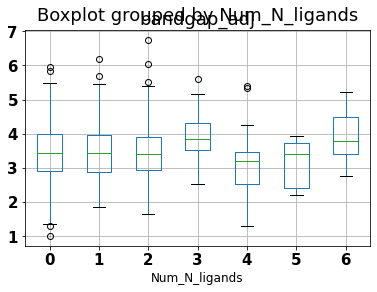

In [52]:
axes = df.boxplot(by='Num_N_ligands', column=['bandgap_adj'])

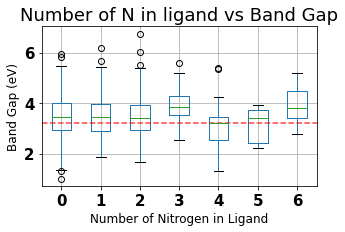

In [60]:
axes = df.boxplot(by='Num_N_ligands', column=['bandgap_adj'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel("Number of Nitrogen in Ligand")
plt.title("Number of N in ligand vs Band Gap")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

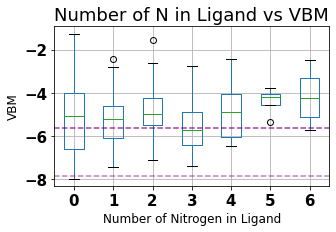

In [153]:
axes = df.boxplot(by='Num_N_ligands', column=['homo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel("Number of Nitrogen in Ligand")
plt.title("Number of N in Ligand vs VBM")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

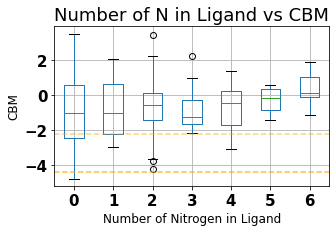

In [154]:
axes = df.boxplot(by='Num_N_ligands', column=['lumo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel("Number of Nitrogen in Ligand")
plt.title("Number of N in Ligand vs CBM")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

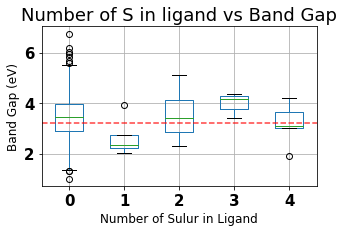

In [61]:
axes = df.boxplot(by='Num_S_ligands', column=['bandgap_adj'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel("Number of Sulur in Ligand")
plt.title("Number of S in ligand vs Band Gap")
# plt.savefig("plots/ligand_chem/num_S_ligand_bandgap.png")
plt.show()

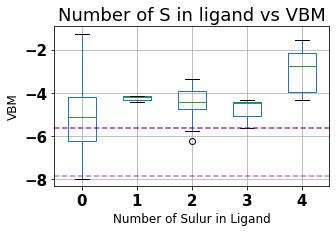

In [62]:
axes = df.boxplot(by='Num_S_ligands', column=['homo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel("Number of Sulur in Ligand")
plt.title("Number of S in ligand vs VBM")
# plt.savefig("plots/ligand_chem/num_S_ligand_VBM.png")
plt.show()

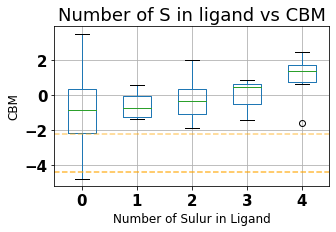

In [64]:
axes = df.boxplot(by='Num_S_ligands', column=['lumo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel("Number of Sulur in Ligand")
plt.title("Number of S in ligand vs CBM")
# plt.savefig("plots/ligand_chem/num_S_ligand_CBM.png")
plt.show()

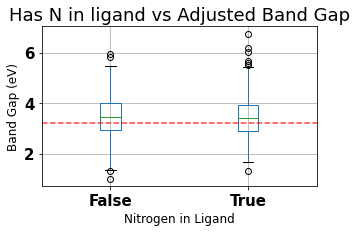

In [158]:
axes = df.boxplot(by='N_in_ligand', column=['bandgap_adj'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel("Nitrogen in Ligand")
plt.title("Has N in ligand vs Band Gap")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

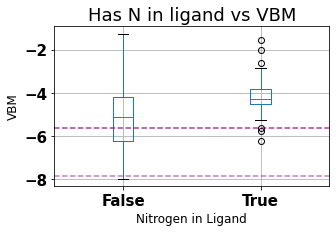

In [159]:
axes = df.boxplot(by='S_in_ligand', column=['homo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel("Nitrogen in Ligand")
plt.title("Has N in ligand vs VBM")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

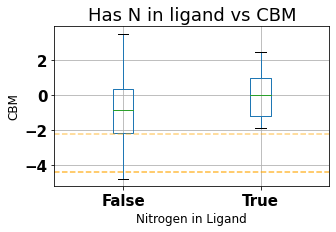

In [160]:
axes = df.boxplot(by='S_in_ligand', column=['lumo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel("Nitrogen in Ligand")
plt.title("Has N in ligand vs CBM")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

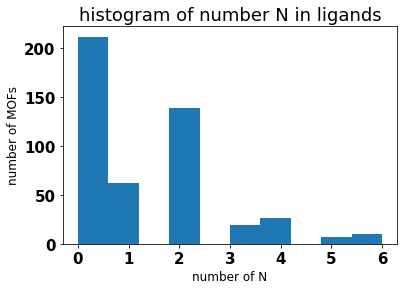

In [79]:
plt.hist(df['Num_N_ligands'])
plt.title('histogram of number N in ligands')
plt.xlabel('number of N')
plt.ylabel('number of MOFs')
# plt.savefig('plots/ligand_chem/N_hist.png')
plt.show()

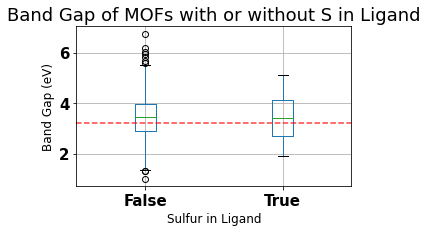

In [65]:
axes = df.boxplot(by='S_in_ligand', column=['bandgap_adj'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel("Sulfur in Ligand")
plt.title("Band Gap of MOFs with or without S in Ligand")
# plt.savefig("plots/ligand_chem/S_in_ligand_bandgap.png")
plt.show()

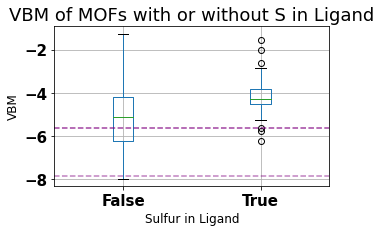

In [67]:
axes = df.boxplot(by='S_in_ligand', column=['homo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel("Sulfur in Ligand")
plt.title("VBM of MOFs with or without S in Ligand")
# plt.savefig("plots/ligand_chem/S_in_ligand_VBM.png")
plt.show()

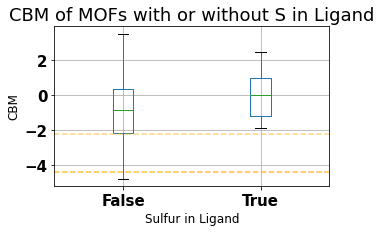

In [69]:
axes = df.boxplot(by='S_in_ligand', column=['lumo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel("Sulfur in Ligand")
plt.title("CBM of MOFs with or without S in Ligand")
# plt.savefig("plots/ligand_chem/S_in_ligand_CBM.png")
plt.show()

In [84]:
def get_avg_en(ens):
    if len(ens) == 0:
        return None
    return sum(ens)/len(ens)

def get_min_en(ens):
    if len(ens) == 0:
        return None
    return min(ens)

def get_max_en(ens):
    if len(ens) == 0:
        return None
    return max(ens)

def get_std_en(ens):
    if len(ens) < 2:
        return None
    return statistics.stdev(ens)

In [85]:
df['avg_electronegativity'] = df['lind_electronegativities'].apply(get_avg_en)
df['min_electronegativity'] = df['lind_electronegativities'].apply(get_min_en)
df['max_electronegativity'] = df['lind_electronegativities'].apply(get_max_en)
df['std_electronegativity'] = df['lind_electronegativities'].apply(get_std_en)

Text(0.5, 1.0, 'Avg Ligand Electronegativity vs VBM')

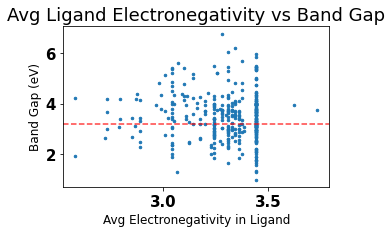

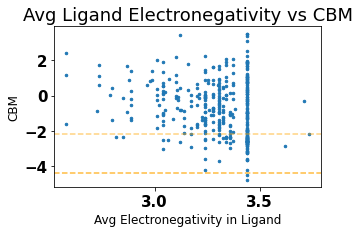

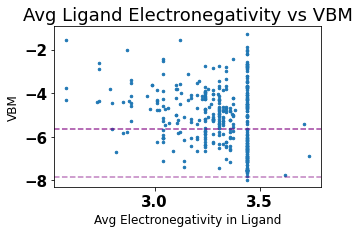

In [175]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_electronegativity'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Avg Electronegativity in Ligand')
plt.title("Avg Ligand Electronegativity vs Band Gap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_electronegativity'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('Avg Electronegativity in Ligand')
plt.title("Avg Ligand Electronegativity vs Band Gap")
plt.title("Avg Ligand Electronegativity vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_electronegativity'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Avg Electronegativity in Ligand')
plt.title("Avg Ligand Electronegativity vs VBM")

Text(0.5, 1.0, 'Min Ligand Electronegativity vs VBM')

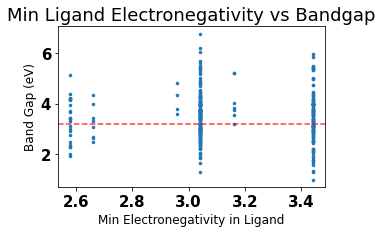

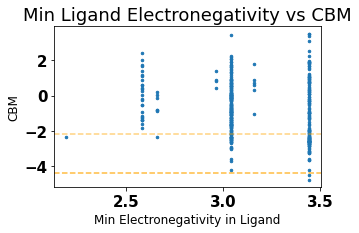

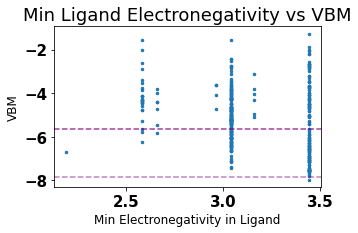

In [181]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['min_electronegativity'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('min_en')
plt.xlabel('Min Electronegativity in Ligand')
plt.title("Min Ligand Electronegativity vs Bandgap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['min_electronegativity'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('min_en')
plt.xlabel('Min Electronegativity in Ligand')
plt.title("Min Ligand Electronegativity vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['min_electronegativity'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Min Electronegativity in Ligand')
plt.title("Min Ligand Electronegativity vs VBM")

Text(0.5, 1.0, 'Max Ligand Electronegativity vs VBM')

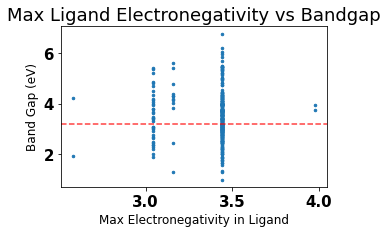

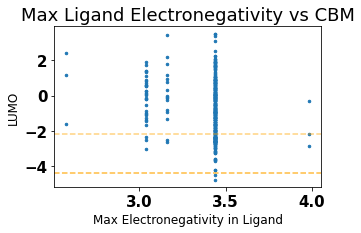

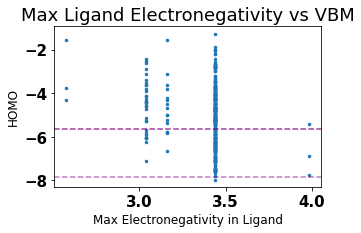

In [180]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['max_electronegativity'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Max Electronegativity in Ligand')
plt.title("Max Ligand Electronegativity vs Bandgap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['max_electronegativity'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("LUMO")
plt.xlabel('Max Electronegativity in Ligand')
plt.title("Max Ligand Electronegativity vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['max_electronegativity'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("HOMO")
plt.xlabel('Max Electronegativity in Ligand')
plt.title("Max Ligand Electronegativity vs VBM")

Text(0.5, 1.0, 'Std Dev Ligand Electronegativity vs VBM')

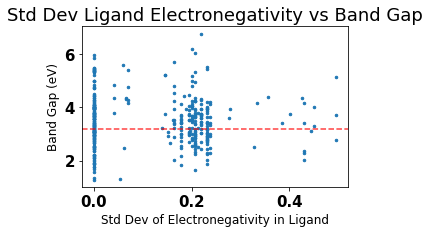

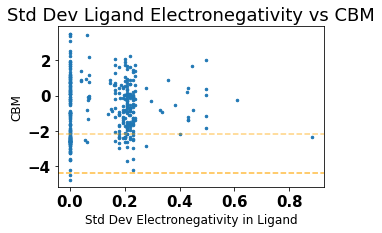

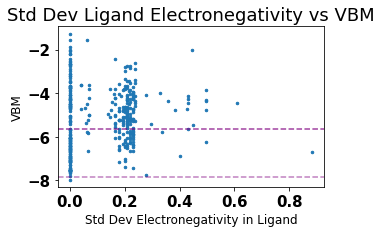

In [86]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['std_electronegativity'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Std Dev of Electronegativity in Ligand')
plt.title("Std Dev Ligand Electronegativity vs Band Gap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['std_electronegativity'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('Std Dev Electronegativity in Ligand')
plt.title("Std Dev Ligand Electronegativity vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['std_electronegativity'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Std Dev Electronegativity in Ligand')
plt.title("Std Dev Ligand Electronegativity vs VBM")

### atomic radii (analogous to electronegativity plots above)

In [88]:
def get_avg_ar(ars):
    if len(ars) == 0:
        return None
    return sum(ars)/len(ars)

def get_min_ar(ars):
    if len(ars) == 0:
        return None
    return min(ars)

def get_max_ar(ars):
    if len(ars) == 0:
        return None
    return max(ars)



In [89]:
df['avg_atomic_radius'] = df['ligand_atomic_radii'].apply(get_avg_ar)
df['min_atomic_radius'] = df['ligand_atomic_radii'].apply(get_min_ar)
df['max_atomic_radius'] = df['ligand_atomic_radii'].apply(get_max_ar)

Text(0.5, 1.0, 'Avg Ligand Atomic Radius vs VBM')

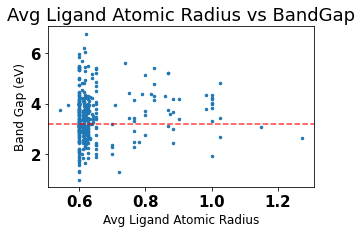

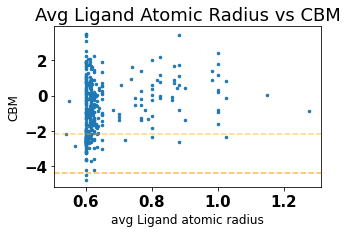

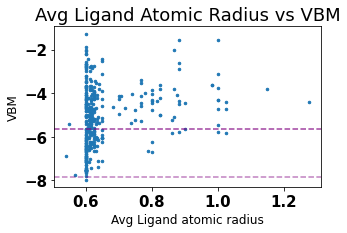

In [183]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_atomic_radius'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Avg Ligand Atomic Radius')
plt.title("Avg Ligand Atomic Radius vs BandGap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_atomic_radius'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('avg Ligand atomic radius')
plt.title("Avg Ligand Atomic Radius vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_atomic_radius'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Avg Ligand atomic radius')
plt.title("Avg Ligand Atomic Radius vs VBM")

Text(0.5, 1.0, 'Min Ligand Atomic Radius vs VBM')

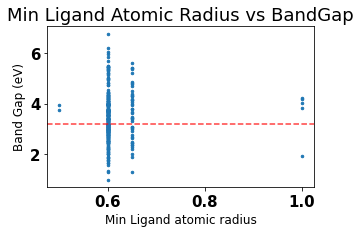

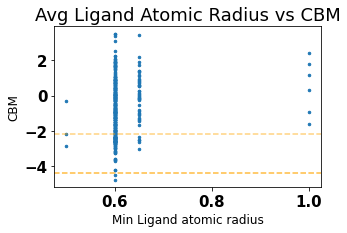

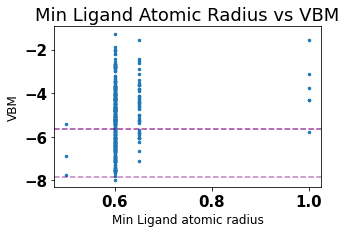

In [196]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['min_atomic_radius'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Min Ligand atomic radius')
plt.title("Min Ligand Atomic Radius vs BandGap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['min_atomic_radius'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('Min Ligand atomic radius')
plt.title("Min Ligand Atomic Radius vs CBM")


plt.figure(figsize=fig_sizes)
plt.scatter(df['min_atomic_radius'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Min Ligand atomic radius')
plt.title("Min Ligand Atomic Radius vs VBM")

Text(0.5, 1.0, 'Max Ligand Atomic Radius vs VBM')

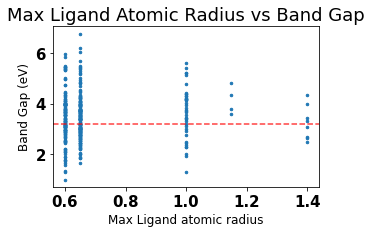

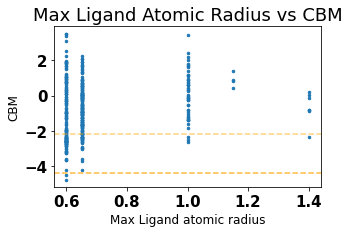

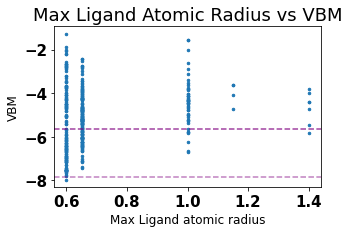

In [199]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['max_atomic_radius'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Max Ligand atomic radius')
plt.title("Max Ligand Atomic Radius vs Band Gap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['max_atomic_radius'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('Max Ligand atomic radius')
plt.title("Max Ligand Atomic Radius vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['max_atomic_radius'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Max Ligand atomic radius')
plt.title("Max Ligand Atomic Radius vs VBM")

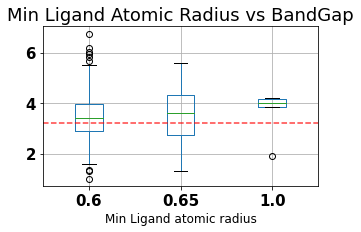

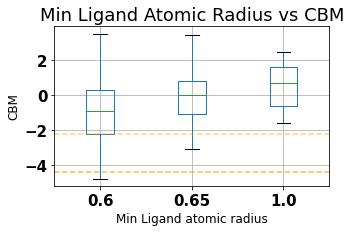

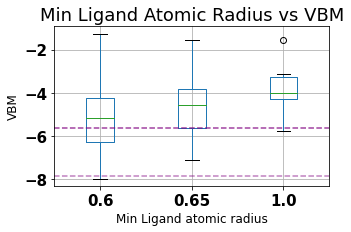

In [198]:
dummy_df = df[df['min_atomic_radius'] != .5]
axes = dummy_df.boxplot(by='min_atomic_radius', column=['bandgap_adj'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.xlabel('Min Ligand atomic radius')
plt.title("Min Ligand Atomic Radius vs BandGap")

# plt.savefig("plots/metal_bandgap.png")
plt.show()


axes = dummy_df.boxplot(by='min_atomic_radius', column=['lumo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('Min Ligand atomic radius')
plt.title("Min Ligand Atomic Radius vs CBM")
plt.show()


axes = dummy_df.boxplot(by='min_atomic_radius', column=['homo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('Min Ligand atomic radius')
plt.title("Min Ligand Atomic Radius vs VBM")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

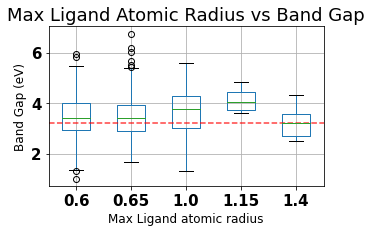

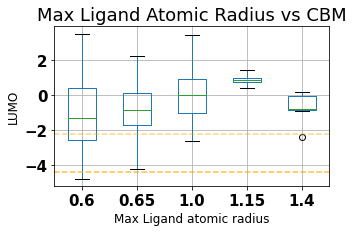

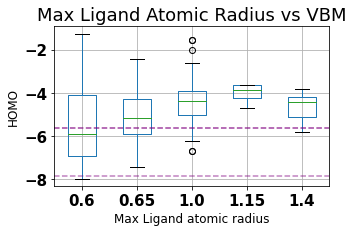

In [200]:
axes = df.boxplot(by='max_atomic_radius', column=['bandgap_adj'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Max Ligand atomic radius')
plt.title("Max Ligand Atomic Radius vs Band Gap")# plt.savefig("plots/metal_bandgap.png")
plt.show()

axes = df.boxplot(by='max_atomic_radius', column=['lumo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("LUMO")
plt.xlabel('Max Ligand atomic radius')
plt.title("Max Ligand Atomic Radius vs CBM")
plt.show()

axes = df.boxplot(by='max_atomic_radius', column=['homo_above_vacuum'])
fig = axes.get_figure()
fig.suptitle('')
fig.set_size_inches(fig_sizes)
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("HOMO")
plt.xlabel('Max Ligand atomic radius')
plt.title("Max Ligand Atomic Radius vs VBM")
# plt.savefig("plots/metal_bandgap.png")
plt.show()

### http://www.rdkit.org/docs/GettingStartedInPython.html#substructure-searching for rdkit stuff kevin was talking about, searching for stuff in structure

# Distances

In [16]:
df['avg_dist'] = df['distances'].apply(lambda x: sum(x)/len(x) if len(x) > 0 else None)
df['max_dist'] = df['distances'].apply(lambda x: max(x) if len(x) > 0 else None)
df['min_dist'] = df['distances'].apply(lambda x: min(x) if len(x) > 0 else None)

Text(0.5, 1.0, 'avg channel dist vs VBM')

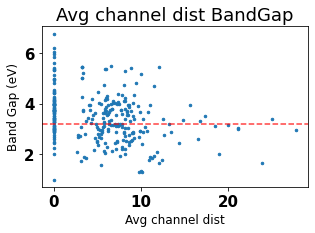

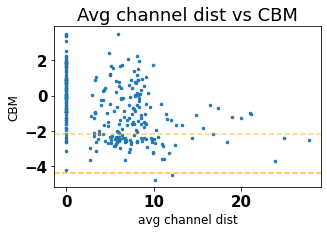

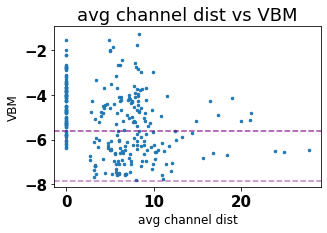

In [20]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_dist'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('Avg channel dist')
plt.title("Avg channel dist BandGap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_dist'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('avg channel dist')
plt.title("Avg channel dist vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['avg_dist'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('avg channel dist')
plt.title("avg channel dist vs VBM")

Text(0.5, 1.0, 'min channel dist vs VBM')

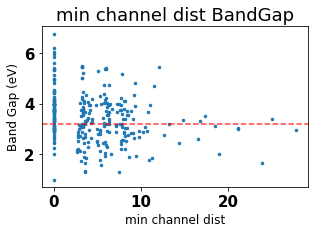

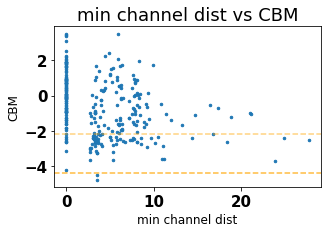

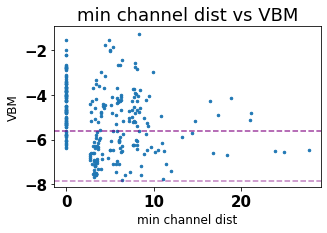

In [21]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['min_dist'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('min channel dist')
plt.title("min channel dist BandGap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['min_dist'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('min channel dist')
plt.title("min channel dist vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['min_dist'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('min channel dist')
plt.title("min channel dist vs VBM")

Text(0.5, 1.0, 'max channel dist vs VBM')

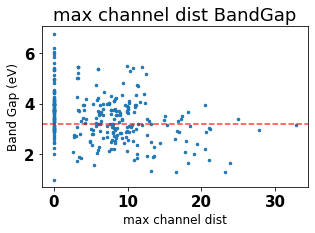

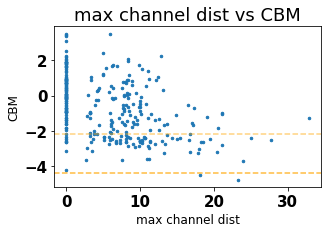

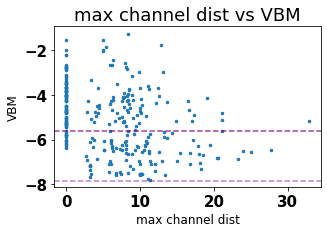

In [22]:
plt.figure(figsize=fig_sizes)
plt.scatter(df['max_dist'], df['bandgap_adj'])
plt.axhline(y=VIS_E, color='red', linestyle='--', alpha=0.75, label='hi')
plt.ylabel("Band Gap (eV)")
plt.xlabel('max channel dist')
plt.title("max channel dist BandGap")

plt.figure(figsize=fig_sizes)
plt.scatter(df['max_dist'], df['lumo_above_vacuum'])
plt.axhline(y=HER, color='orange', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=HER+2.2, color='orange', linestyle='--',alpha=0.5)
plt.ylabel("CBM")
plt.xlabel('max channel dist')
plt.title("max channel dist vs CBM")

plt.figure(figsize=fig_sizes)
plt.scatter(df['max_dist'], df['homo_above_vacuum'])
plt.axhline(y=OER, color='purple', linestyle='--',alpha=0.75) ## h2o/o2 OER
plt.axhline(y=OER-2.2, color='purple', linestyle='--',alpha=0.5)
plt.ylabel("VBM")
plt.xlabel('max channel dist')
plt.title("max channel dist vs VBM")